© Alexander Jüstel, Fraunhofer IEG, Institution for Energy Infrastructures and Geothermal Systems, RWTH Aachen University, GNU Lesser General Public License v3.0

This notebook was created by Alexander Jüstel and is part of the DGE Rollout Heat Demand Mapping project carried out by students of RWTH Aachen University within the framework of their master thesis.

# Cropping the masks to the data regions

In order to process the single data sets, the 10x10 km2 mask will be cropped to the respective data regions. 



# Importing Libraries

In [55]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

import sys 
sys.path.insert(0, '../../../processing/')

import data_processing

# Cropping the mask to the region of DE-NW

The area of the state of Nordrhein-Westfalen is equal to the NUTS 1 area for the country for the same state (DE-NW). The area of DE-NW will therefore be extracted from the Shape File containing the NUTS 1 regions. A buffer of 15 km is chosen to ensure that the 10x10 km2 masks cover the entire state. 

In [2]:
interreg_new_region_nuts1 = gpd.read_file('../../../data/outlines/shapes_nwe_region/Interreg_NWE_NUTS1_3034.shp')
interreg_new_region_nuts1.head()

,CNTR_CODE,NAME_LATN,area_m2,Region,geometry
0,FR,Pays de la Loire,3.232866e+10,FR-PDL,"MULTIPOLYGON (((3088284.755 2310490.484, 30883..."
1,FR,Bretagne,2.735205e+10,FR-BRE,"MULTIPOLYGON (((2930641.614 2531547.043, 29306..."
2,UK,South West (England),2.389106e+10,UKK,"MULTIPOLYGON (((2874711.281 2699278.507, 28747..."
3,UK,South East (England),1.910486e+10,UKJ,"MULTIPOLYGON (((3235335.763 2725588.105, 32354..."
4,UK,Wales,2.080587e+10,UKL,"MULTIPOLYGON (((3022516.409 2859385.211, 30225..."


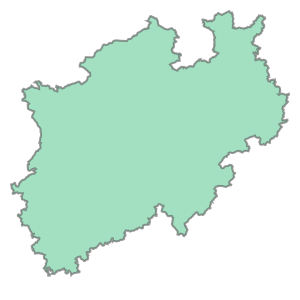

In [3]:
outline_nrw = interreg_new_region_nuts1[interreg_new_region_nuts1['NAME_LATN']=='Nordrhein-Westfalen']
outline_nrw.geometry[17]

In [74]:
outline_nrw.to_file('../../../data/outlines/shapes_de_nw/de_nw_outline.shp')
outline_nrw.to_crs('EPSG:4326').to_file('../../../data/outlines/geojson_de_nw/de_nw_outline.geosjon', driver='GeoJSON')

# Loading the Interreg NWE 10 km mask

In [5]:
interreg_new_region_mask_10km = gpd.read_file('../../../data/masks/shapes_nwe_region/Interreg_NWE_mask_10km_3034.shp')
interreg_new_region_mask_10km.head()

,FID,geometry
0,0,"POLYGON ((2639984.000 2129951.500, 2639984.000..."
1,1,"POLYGON ((2639984.000 2139951.500, 2639984.000..."
2,2,"POLYGON ((2639984.000 2149951.500, 2639984.000..."
3,3,"POLYGON ((2639984.000 2159951.500, 2639984.000..."
4,4,"POLYGON ((2639984.000 2169951.500, 2639984.000..."


# Clipping the Interreg NWE 10 km mask

Clipping the Interreg NWE 10 km mask to the outline of DE-NW will be done by intersecting the the mask with the outline of DE-NW.

In [67]:
mask_de_nw_10km = interreg_new_region_mask_10km[interreg_new_region_mask_10km.intersects(outline_nrw.geometry[17])].reset_index()

mask_de_nw_10km.to_file('../../../data/masks/shapes_de_nw/mask_de_nw_10km.shp')
mask_de_nw_10km.to_crs('EPSG:4326').to_file('../../../data/masks/geojsons_de_nw/mask_de_nw_10km.geojson', driver='GeoJSON')
mask_de_nw_10km

,index,FID,geometry
0,18197,18197,"POLYGON ((3719984.000 2659951.500, 3719984.000..."
1,18198,18198,"POLYGON ((3719984.000 2669951.500, 3719984.000..."
2,18199,18199,"POLYGON ((3719984.000 2679951.500, 3719984.000..."
3,18200,18200,"POLYGON ((3719984.000 2689951.500, 3719984.000..."
4,18201,18201,"POLYGON ((3719984.000 2699951.500, 3719984.000..."
...,...,...,...
382,22073,22073,"POLYGON ((3949984.000 2779951.500, 3949984.000..."
383,22074,22074,"POLYGON ((3949984.000 2789951.500, 3949984.000..."
384,22239,22239,"POLYGON ((3959984.000 2759951.500, 3959984.000..."
385,22240,22240,"POLYGON ((3959984.000 2769951.500, 3959984.000..."


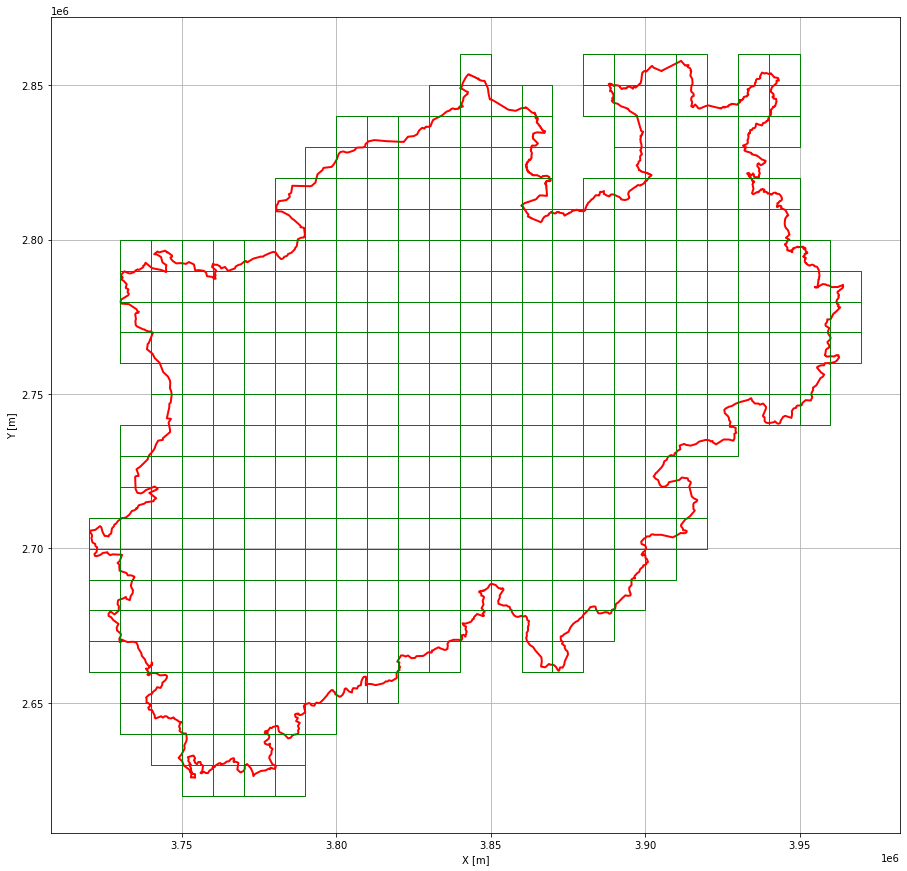

In [68]:
fig, ax = plt.subplots(figsize=(20,15))
outline_nrw.boundary.plot(ax=ax, linewidth=2, color='red')
mask_de_nw_10km.boundary.plot(ax=ax, linewidth=1, color='green')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()

# Creating 100x100 m2 mask from 10x10 km2 mask

Following the 10x10 km2 mask, the mask consisting of 100x100 m2 squares will be created in the same way as before. 

# Creating the 100x100 m2 mask for DE-NW

Due to the duration of this operation. It will not be carried out here. 

# Clipping mask to sample region

The 100x100 m2 mask for NRW will be clipped to the outline of sample region. 

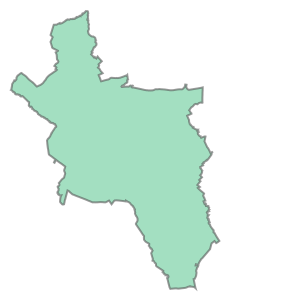

In [75]:
outline_aachen = gpd.read_file('../../../data/outlines/shapes_de_nw/de_nw_aachen_outline.shp').to_crs('EPSG:3034')
outline_aachen.geometry[0]

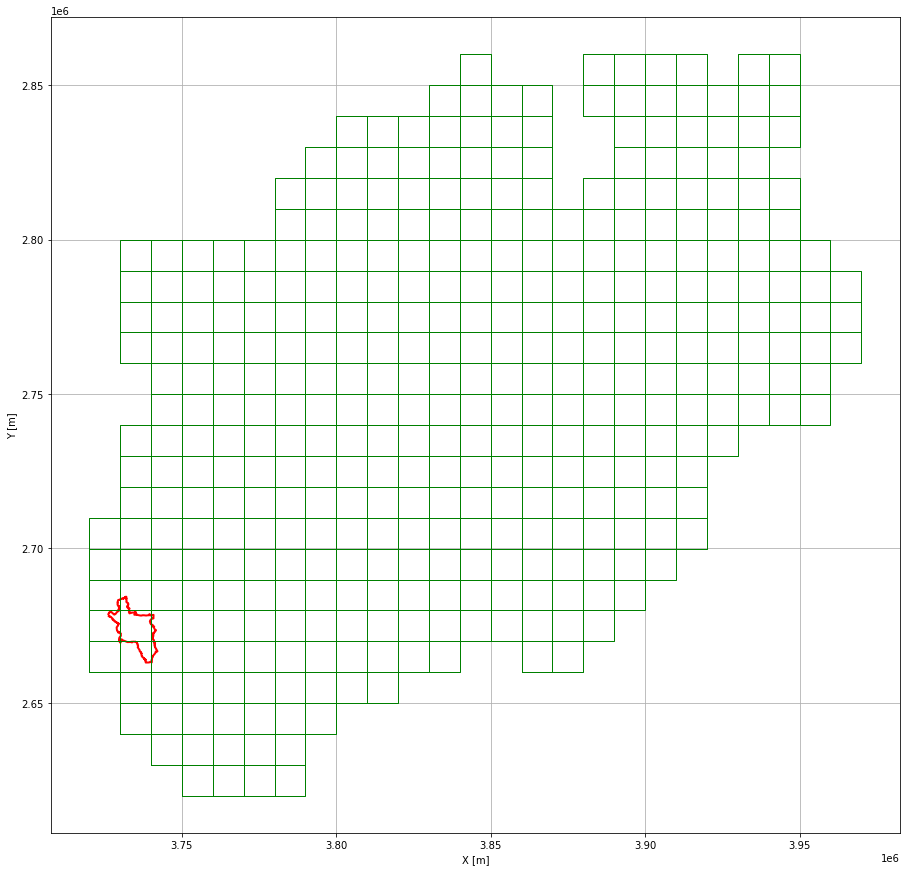

In [76]:
fig, ax = plt.subplots(figsize=(20,15))
outline_aachen.boundary.plot(ax=ax, linewidth=2, color='red')
# mask_de_nw_100m.boundary.plot(ax=ax, linewidth=1, color='green')
mask_de_nw_10km.boundary.plot(ax=ax, linewidth=1, color='green')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()

# Clipping the region

Clipping the region to the sample outline and saving the data to file. 

In [80]:
mask_aachen_10km = mask_de_nw_10km[mask_de_nw_10km.intersects(outline_aachen.geometry[0])].reset_index()

mask_aachen_10km.to_file('../../../data/masks/shapes_de_nw/mask_de_nw_aachen_10km.shp')
mask_aachen_10km.to_crs('EPSG:4326').to_file('../../../data/masks/geojsons_de_nw/mask_de_nw_aachen_10km.geojson', driver='GeoJSON')
mask_aachen_10km

,level_0,index,FID,geometry
0,0,18197,18197,"POLYGON ((3719984.000 2659951.500, 3719984.000..."
1,1,18198,18198,"POLYGON ((3719984.000 2669951.500, 3719984.000..."
2,2,18199,18199,"POLYGON ((3719984.000 2679951.500, 3719984.000..."
3,7,18365,18365,"POLYGON ((3729984.000 2659951.500, 3729984.000..."
4,8,18366,18366,"POLYGON ((3729984.000 2669951.500, 3729984.000..."
5,9,18367,18367,"POLYGON ((3729984.000 2679951.500, 3729984.000..."
6,22,18533,18533,"POLYGON ((3739984.000 2659951.500, 3739984.000..."
7,23,18534,18534,"POLYGON ((3739984.000 2669951.500, 3739984.000..."


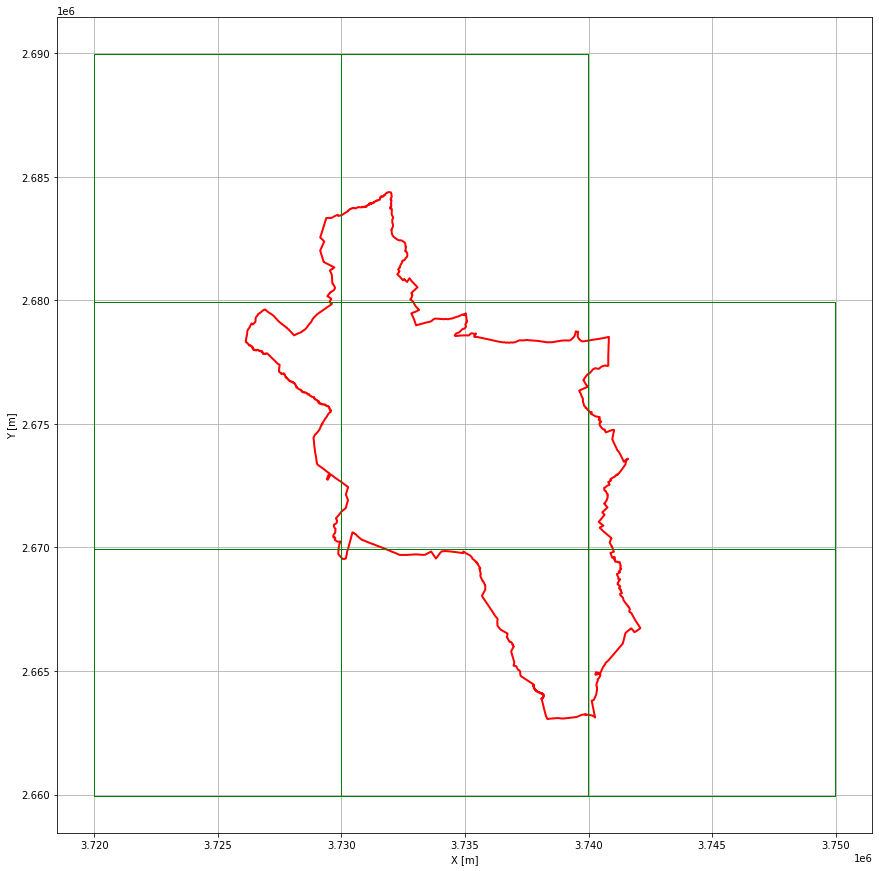

In [78]:
fig, ax = plt.subplots(figsize=(20,15))
outline_aachen.boundary.plot(ax=ax, linewidth=2, color='red')
# mask_de_nw_100m.boundary.plot(ax=ax, linewidth=1, color='green')
mask_aachen_10km.boundary.plot(ax=ax, linewidth=1, color='green')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()